# Feature Engineering Project
- imports

In [1]:
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

- Data Reading

In [2]:
def read_and_combine(folder: str = "training"):
    
    # Path to the folder containing CSV files
    folder_path = "../data/" + folder
    # List to store DataFrames from each CSV file
    dataFrames = []
    # Loop through all files in the folder
    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            # Read each CSV file into a DataFrame and append to the list
            dataframe = pd.read_csv(file_path)
            dataFrames.append(dataframe)
    # Combine all DataFrames into one
    combined_dataframe = pd.concat(dataFrames, ignore_index=True)
    # Save the combined DataFrame to a new CSV file
    combined_dataframe.to_csv('combined_output.csv', index=False)
    # Display the combined DataFrame
    return combined_dataframe

In [3]:
training_data = read_and_combine()
training_data.shape

100%|██████████| 185/185 [00:02<00:00, 80.09it/s]


(672744, 25)

In [4]:
validation_data = read_and_combine("validation")
validation_data.shape

100%|██████████| 185/185 [00:00<00:00, 253.09it/s]


(144148, 25)

In [5]:
test_data = read_and_combine("test")
test_data.shape

100%|██████████| 185/185 [00:02<00:00, 83.74it/s]


(156262, 25)

In [6]:
training_data.dtypes

MACHINE_ID                       object
MACHINE_DATA                     object
TIMESTAMP                       float64
WAFER_ID                         object
STAGE                            object
CHAMBER                         float64
USAGE_OF_BACKING_FILM           float64
USAGE_OF_DRESSER                float64
USAGE_OF_POLISHING_TABLE        float64
USAGE_OF_DRESSER_TABLE          float64
PRESSURIZED_CHAMBER_PRESSURE    float64
MAIN_OUTER_AIR_BAG_PRESSURE     float64
CENTER_AIR_BAG_PRESSURE         float64
RETAINER_RING_PRESSURE          float64
RIPPLE_AIR_BAG_PRESSURE         float64
USAGE_OF_MEMBRANE               float64
USAGE_OF_PRESSURIZED_SHEET      float64
SLURRY_FLOW_LINE_A              float64
SLURRY_FLOW_LINE_B              float64
SLURRY_FLOW_LINE_C              float64
WAFER_ROTATION                  float64
STAGE_ROTATION                  float64
HEAD_ROTATION                   float64
DRESSING_WATER_STATUS           float64
EDGE_AIR_BAG_PRESSURE           float64


In [7]:
training_data.describe()

,TIMESTAMP,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,PRESSURIZED_CHAMBER_PRESSURE,MAIN_OUTER_AIR_BAG_PRESSURE,CENTER_AIR_BAG_PRESSURE,RETAINER_RING_PRESSURE,...,USAGE_OF_MEMBRANE,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE
count,6.727440e+05,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,...,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000
mean,4.844186e+08,4.223673,4968.532485,396.444964,171.983843,3496.348712,49.973427,155.327976,40.147023,1218.777316,...,58.915409,1490.559854,4.245952,0.725417,249.354458,12.802433,52.437560,159.792734,0.424763,28.531700
std,1.639134e+06,1.333534,2888.628864,219.524524,94.623563,479.742809,39.241073,133.191797,34.240954,1499.216737,...,34.252516,866.588654,6.683546,0.420575,214.034647,16.325427,91.878220,8.889108,0.494307,24.346485
min,4.816344e+08,1.000000,19.166667,5.185185,0.000000,2664.750000,0.000000,0.000000,0.000000,0.000000,...,0.227273,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.827736e+08,4.000000,2425.000000,205.185185,88.888889,3041.000000,0.000000,0.000000,0.000000,0.000000,...,28.754941,727.500000,2.222222,0.909091,0.000000,0.000000,0.000000,156.800000,0.000000,0.000000
50%,4.846534e+08,4.000000,5036.666667,395.925926,172.592593,3544.750000,72.857143,252.000000,61.250000,1446.900000,...,59.723320,1511.000000,2.222222,0.909091,411.600000,0.000000,0.000000,160.000000,0.000000,43.939394
75%,4.857991e+08,5.000000,7322.500000,590.370370,254.074074,3912.000000,77.142857,268.800000,66.250000,1454.700000,...,86.828063,2196.750000,2.222222,0.909091,439.600000,34.651163,65.526316,160.000000,1.000000,48.484848
max,4.872682e+08,6.000000,10532.500000,771.851852,357.037037,4305.500000,189.047619,499.200000,139.375000,10662.600000,...,124.891304,3159.750000,42.638889,12.500000,1083.600000,34.883721,263.552632,192.000000,1.000000,141.515152


- Feature Extraction

In [8]:
def extract_features(data: pd.DataFrame,
                    id_column: str = "WAFER_ID",
                    non_extracted_columns: list = ["TIMESTAMP", "WAFER_ID", "CHAMBER"]):
    
    unique_ids = data[id_column].unique()
    
    data_rows = []
    for wafer in tqdm(unique_ids):
        wafer_data = data[data["WAFER_ID"]==wafer]
        # Iterate through each numerical column and calculate the features using numpy
        features_np = {}
        for column in wafer_data.select_dtypes(include='number').columns:
            if column in non_extracted_columns:
                continue
            col_data = wafer_data[column].values  # Convert the column to a numpy array
            features_np.update({
                f'{column}_Mean': np.mean(col_data),
                f'{column}_Median': np.median(col_data),
                f'{column}_StdDev': np.std(col_data, ddof=1),  # ddof=1 for sample standard deviation
                f'{column}_Variance': np.var(col_data, ddof=1),  # ddof=1 for sample variance
                f'{column}_Minimum': np.min(col_data),
                f'{column}_Maximum': np.max(col_data),
                f'{column}_Range': np.ptp(col_data),  # Peak-to-peak is a simpler way to compute range
                f'{column}_Skewness': pd.Series(col_data).skew(),  # Using pandas for skew as numpy does not have a direct function
                f'{column}_Kurtosis': pd.Series(col_data).kurt(),  # Using pandas for kurtosis as numpy does not have a direct function
                f'{column}_25thPercentile': np.percentile(col_data, 25),
                f'{column}_50thPercentile': np.percentile(col_data, 50),
                f'{column}_75thPercentile': np.percentile(col_data, 75)
            })
        # Convert the features dictionary to a DataFrame
        # Since we want all features in one row, we use pd.DataFrame and specify the index [0]
        feature_df = pd.DataFrame([features_np])
        feature_df.insert(0, "WAFER_ID", wafer)
        feature_df.insert(1, "STAGE", np.unique(wafer_data["STAGE"])[0])
        feature_df.insert(2, "CHAMBER", np.unique(wafer_data["CHAMBER"])[0])

        data_rows.append(feature_df)
    extracted_data = pd.concat(data_rows)
    return extracted_data

In [9]:
training_set = extract_features(training_data)
training_set.dtypes

100%|██████████| 1699/1699 [01:24<00:00, 20.15it/s]


WAFER_ID                                  int64
STAGE                                    object
CHAMBER                                 float64
USAGE_OF_BACKING_FILM_Mean              float64
USAGE_OF_BACKING_FILM_Median            float64
                                         ...   
EDGE_AIR_BAG_PRESSURE_Skewness          float64
EDGE_AIR_BAG_PRESSURE_Kurtosis          float64
EDGE_AIR_BAG_PRESSURE_25thPercentile    float64
EDGE_AIR_BAG_PRESSURE_50thPercentile    float64
EDGE_AIR_BAG_PRESSURE_75thPercentile    float64
Length: 231, dtype: object

In [11]:
validation_set = extract_features(validation_data)
validation_set.dtypes

100%|██████████| 416/416 [00:10<00:00, 38.98it/s]


WAFER_ID                                  int64
STAGE                                    object
CHAMBER                                 float64
USAGE_OF_BACKING_FILM_Mean              float64
USAGE_OF_BACKING_FILM_Median            float64
                                         ...   
EDGE_AIR_BAG_PRESSURE_Skewness          float64
EDGE_AIR_BAG_PRESSURE_Kurtosis          float64
EDGE_AIR_BAG_PRESSURE_25thPercentile    float64
EDGE_AIR_BAG_PRESSURE_50thPercentile    float64
EDGE_AIR_BAG_PRESSURE_75thPercentile    float64
Length: 231, dtype: object

In [12]:
test_set = extract_features(test_data)
test_data.dtypes

  0%|          | 0/415 [00:00<?, ?it/s]

100%|██████████| 415/415 [00:10<00:00, 38.07it/s]


MACHINE_ID                       object
MACHINE_DATA                     object
TIMESTAMP                       float64
WAFER_ID                         object
STAGE                            object
CHAMBER                         float64
USAGE_OF_BACKING_FILM           float64
USAGE_OF_DRESSER                float64
USAGE_OF_POLISHING_TABLE        float64
USAGE_OF_DRESSER_TABLE          float64
PRESSURIZED_CHAMBER_PRESSURE    float64
MAIN_OUTER_AIR_BAG_PRESSURE     float64
CENTER_AIR_BAG_PRESSURE         float64
RETAINER_RING_PRESSURE          float64
RIPPLE_AIR_BAG_PRESSURE         float64
USAGE_OF_MEMBRANE               float64
USAGE_OF_PRESSURIZED_SHEET      float64
SLURRY_FLOW_LINE_A              float64
SLURRY_FLOW_LINE_B              float64
SLURRY_FLOW_LINE_C              float64
WAFER_ROTATION                  float64
STAGE_ROTATION                  float64
HEAD_ROTATION                   float64
DRESSING_WATER_STATUS           float64
EDGE_AIR_BAG_PRESSURE           float64


In [13]:
del training_data, validation_data, test_data

- Add the output column to the sets

In [14]:
def add_output_column(data: pd.DataFrame(),
                      data_name: str = "training"):
    output_data = pd.read_csv("../data/CMP-" + data_name + "-removalrate.csv")
    data = pd.merge(data, output_data, on=['WAFER_ID', 'STAGE'])
    return data   

In [15]:
training_set = add_output_column(training_set)

In [16]:
training_set['STAGE'] = training_set['STAGE'].replace({'A': 0, 'B': 1})
training_set.head()

,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM_Mean,USAGE_OF_BACKING_FILM_Median,USAGE_OF_BACKING_FILM_StdDev,USAGE_OF_BACKING_FILM_Variance,USAGE_OF_BACKING_FILM_Minimum,USAGE_OF_BACKING_FILM_Maximum,USAGE_OF_BACKING_FILM_Range,...,EDGE_AIR_BAG_PRESSURE_Variance,EDGE_AIR_BAG_PRESSURE_Minimum,EDGE_AIR_BAG_PRESSURE_Maximum,EDGE_AIR_BAG_PRESSURE_Range,EDGE_AIR_BAG_PRESSURE_Skewness,EDGE_AIR_BAG_PRESSURE_Kurtosis,EDGE_AIR_BAG_PRESSURE_25thPercentile,EDGE_AIR_BAG_PRESSURE_50thPercentile,EDGE_AIR_BAG_PRESSURE_75thPercentile,AVG_REMOVAL_RATE
0,371447024,0,1.0,9307.651515,9307.500000,3.083687e+00,9.509126e+00,9302.500000,9313.333333,10.833333,...,381.541027,0.0,60.909091,60.909091,-2.039952,2.612346,48.787879,60.606061,60.909091,149.13090
1,371447028,0,1.0,9356.666667,9356.666667,1.822178e-12,3.320332e-24,9356.666667,9356.666667,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.04915
2,371447036,0,1.0,9356.666667,9356.666667,1.822294e-12,3.320754e-24,9356.666667,9356.666667,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.70175
3,-4113511818,0,4.0,9624.115882,9972.500000,3.598210e+02,1.294712e+05,9253.333333,9985.833333,732.500000,...,334.830661,0.0,57.878788,57.878788,-1.512967,0.648421,43.939394,44.242424,48.484848,65.02230
4,-4113511780,0,4.0,9266.260623,9266.666667,3.802814e+00,1.446140e+01,9260.000000,9272.500000,12.500000,...,778.262958,0.0,106.363636,106.363636,-0.517512,-0.588680,33.030303,48.787879,69.696970,61.04565


In [17]:
test_set = add_output_column(test_set,
                             data_name="test")

In [18]:
test_set['STAGE'] = test_set['STAGE'].replace({'A': 0, 'B': 1})
test_set.head()

,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM_Mean,USAGE_OF_BACKING_FILM_Median,USAGE_OF_BACKING_FILM_StdDev,USAGE_OF_BACKING_FILM_Variance,USAGE_OF_BACKING_FILM_Minimum,USAGE_OF_BACKING_FILM_Maximum,USAGE_OF_BACKING_FILM_Range,...,EDGE_AIR_BAG_PRESSURE_Variance,EDGE_AIR_BAG_PRESSURE_Minimum,EDGE_AIR_BAG_PRESSURE_Maximum,EDGE_AIR_BAG_PRESSURE_Range,EDGE_AIR_BAG_PRESSURE_Skewness,EDGE_AIR_BAG_PRESSURE_Kurtosis,EDGE_AIR_BAG_PRESSURE_25thPercentile,EDGE_AIR_BAG_PRESSURE_50thPercentile,EDGE_AIR_BAG_PRESSURE_75thPercentile,AVG_REMOVAL_RATE
0,373446766,0,1.0,9356.666667,9356.666667,3.644469e-12,1.328216e-23,9356.666667,9356.666667,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.2610
1,-4224160592,0,4.0,9332.545761,9332.916667,3.690949e+00,1.362310e+01,9326.666667,9339.166667,12.500000,...,354.062453,0.0,57.878788,57.878788,-1.393967,0.326083,43.939394,44.242424,48.787879,56.1786
2,-887170152,1,4.0,9424.735180,9425.000000,3.707760e+00,1.374749e+01,9418.333333,9430.833333,12.500000,...,721.145318,0.0,106.363636,106.363636,-0.394427,-0.454105,43.939394,44.242424,69.696970,64.3881
3,-4224160678,1,4.0,9526.132959,9526.666667,3.834909e+00,1.470653e+01,9520.000000,9533.333333,13.333333,...,337.359492,0.0,57.878788,57.878788,-1.507054,0.669936,43.939394,44.242424,48.787879,66.9813
4,-4224160686,0,4.0,9614.945238,9615.000000,3.747940e+00,1.404706e+01,9609.166667,9621.666667,12.500000,...,362.786997,0.0,57.878788,57.878788,-1.532967,0.580493,48.484848,48.787879,48.787879,57.2523


In [19]:
training_set.to_csv('training_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)

## To be done
- Create a first model using RandomForests, SVR, and Lasso.
- Rebuild the same model using only the highest ranking features according to RandomForests. What do you notice in the performance?
- Use the ReliefF to select the best feature from the original dataset (*training_set*)
- Rebuild the models using the features selected by the ReliefF.
- What are your conclusions?

# First modeling trials
- Creating the inputs and outputs (*I leuuuuuuve numpy*)

Deleting Outliuers


In [21]:
training_set.shape

(1699, 232)

In [ ]:
# Create training inputs and outputs
training_inputs = training_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE']).values
training_outputs = training_set['AVG_REMOVAL_RATE'].values

# Create test inputs and outputs
test_inputs = test_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE']).values
test_outputs = test_set['AVG_REMOVAL_RATE'].values

- Scaling the data

In [ ]:
# Initialize two MinMaxScaler: one for inputs and one for outputs
inputs_scaler = MinMaxScaler()
outputs_scaler = MinMaxScaler()

# Fit the scalers to the training data and transform both training and test data
# Scaling inputs
scaled_training_inputs = inputs_scaler.fit_transform(training_inputs)
scaled_test_inputs = inputs_scaler.transform(test_inputs)

# Scaling outputs. Reshape is used because fit_transform expects 2D array
scaled_training_outputs = outputs_scaler.fit_transform(training_outputs.reshape(-1, 1)).flatten()
scaled_test_outputs = outputs_scaler.transform(test_outputs.reshape(-1, 1)).flatten()

- First models using RandomForests, SVR, and Lasso.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
# Initialize models
model_rf = RandomForestRegressor()
model_svr = SVR()
model_lasso = Lasso()

# Fit the models
model_rf.fit(scaled_training_inputs, scaled_training_outputs)
model_svr.fit(scaled_training_inputs, scaled_training_outputs)
model_lasso.fit(scaled_training_inputs, scaled_training_outputs)

# Predict on the test data
predictions_rf = model_rf.predict(scaled_test_inputs)
predictions_svr = model_svr.predict(scaled_test_inputs)
predictions_lasso = model_lasso.predict(scaled_test_inputs)

# Inverse transform the predictions and the actual values to get back to the original scale
predictions_rf_inv = outputs_scaler.inverse_transform(predictions_rf.reshape(-1, 1)).flatten()
predictions_svr_inv = outputs_scaler.inverse_transform(predictions_svr.reshape(-1, 1)).flatten()
predictions_lasso_inv = outputs_scaler.inverse_transform(predictions_lasso.reshape(-1, 1)).flatten()
test_outputs_inv = outputs_scaler.inverse_transform(scaled_test_outputs.reshape(-1, 1)).flatten()

# Calculate errors for each model
errors_rf = predictions_rf_inv - test_outputs_inv
errors_svr = predictions_svr_inv - test_outputs_inv
errors_lasso = predictions_lasso_inv - test_outputs_inv

relative_errors_rf = errors_rf / np.maximum(np.abs(test_outputs_inv), 1e-8)
relative_errors_svr = errors_svr / np.maximum(np.abs(test_outputs_inv), 1e-8)
relative_errors_lasso = errors_lasso / np.maximum(np.abs(test_outputs_inv), 1e-8)

# Calculate additional metrics
metrics_rf_updated = {
    'Mean of Error': np.mean(errors_rf),
    'Std of Error': np.std(errors_rf),
    'Max of Error': np.max(errors_rf),
    'MAE': mean_absolute_error(test_outputs_inv, predictions_rf_inv),
    'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_rf_inv),
    'Max Absolute Percentage Error': np.max(np.abs(errors_rf / test_outputs_inv)),
    'MSE': mean_squared_error(test_outputs_inv, predictions_rf_inv),
    'SSE': np.sum(np.square(errors_rf)),
    'R': np.corrcoef(test_outputs_inv, predictions_rf_inv)[0, 1],
    'R2 Score': r2_score(test_outputs_inv, predictions_rf_inv)
}

metrics_svr_updated = {
    'Mean of Error': np.mean(errors_svr),
    'Std of Error': np.std(errors_svr),
    'Max of Error': np.max(errors_svr),
    'MAE': mean_absolute_error(test_outputs_inv, predictions_svr_inv),
    'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_svr_inv),
    'Max Absolute Percentage Error': np.max(np.abs(errors_svr / test_outputs_inv)),
    'MSE': mean_squared_error(test_outputs_inv, predictions_svr_inv),
    'SSE': np.sum(np.square(errors_svr)),
    'R': np.corrcoef(test_outputs_inv, predictions_svr_inv)[0, 1],
    'R2 Score': r2_score(test_outputs_inv, predictions_svr_inv)
}

metrics_lasso_updated = {
    'Mean of Error': np.mean(errors_lasso),
    'Std of Error': np.std(errors_lasso),
    'Max of Error': np.max(errors_lasso),
    'MAE': mean_absolute_error(test_outputs_inv, predictions_lasso_inv),
    'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_lasso_inv),
    'Max Absolute Percentage Error': np.max(np.abs(errors_lasso / test_outputs_inv)),
    'MSE': mean_squared_error(test_outputs_inv, predictions_lasso_inv),
    'SSE': np.sum(np.square(errors_lasso)),
    'R': np.corrcoef(test_outputs_inv, predictions_lasso_inv)[0, 1],
    'R2 Score': r2_score(test_outputs_inv, predictions_lasso_inv)
}

# Create a pandas DataFrame to display the results
results_df = pd.DataFrame({'Random Forest': metrics_rf_updated,
                           'SVR': metrics_svr_updated,
                           'Lasso': metrics_lasso_updated})

results_df.T

,Mean of Error,Std of Error,Max of Error,MAE,Mean Absolute Percentage Error,Max Absolute Percentage Error,MSE,SSE,R,R2 Score
Random Forest,6.565266,66.831445,1196.123601,9.229952,0.102788,16.461961,4509.544755,1.866952e+06,4.371825e-01,-4.069127
SVR,-21.405207,175.293203,763.381067,141.631124,1.647594,6.975884,31185.889820,1.291096e+07,1.386717e-01,-34.055696
Lasso,11.579264,29.826327,47.257613,29.373924,0.339342,0.867072,1023.689138,4.238073e+05,2.508861e-16,-0.150717


- Error Analysis

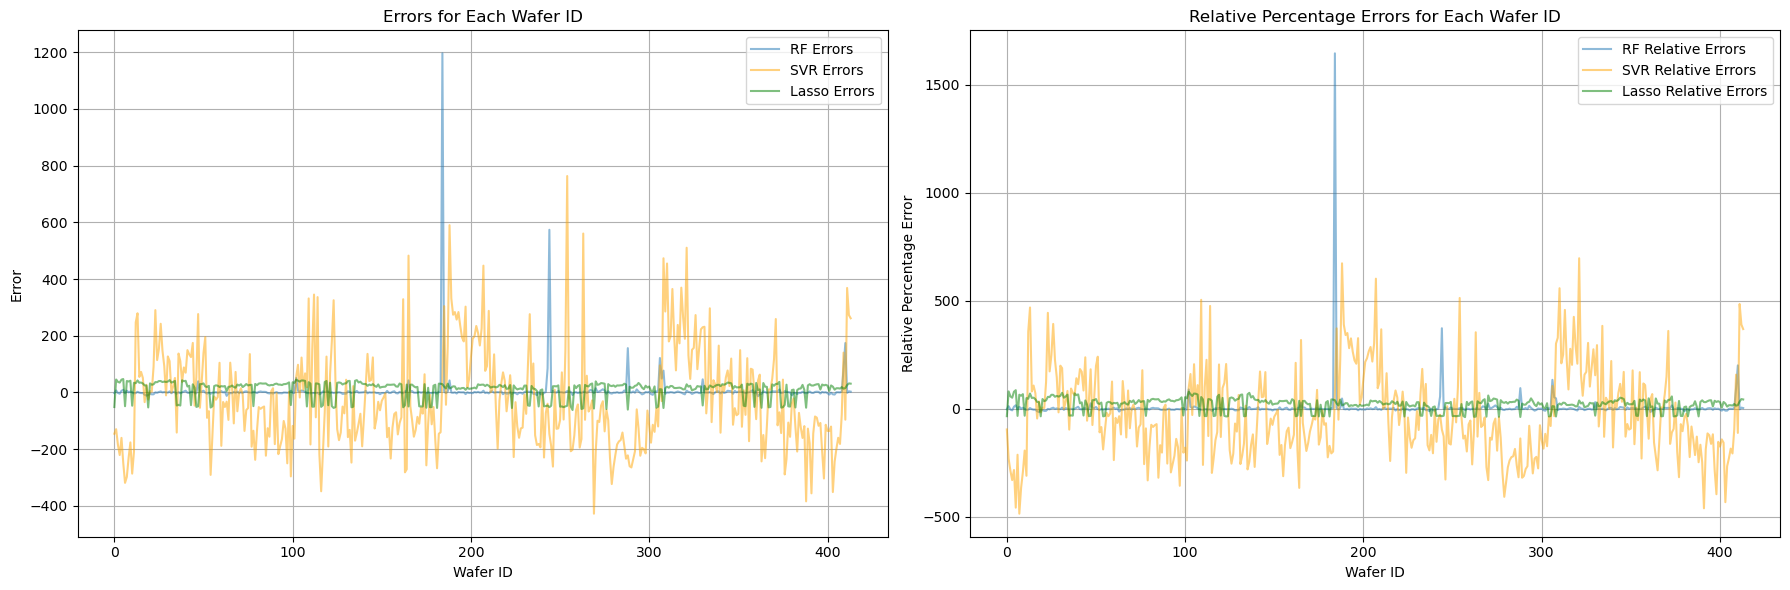

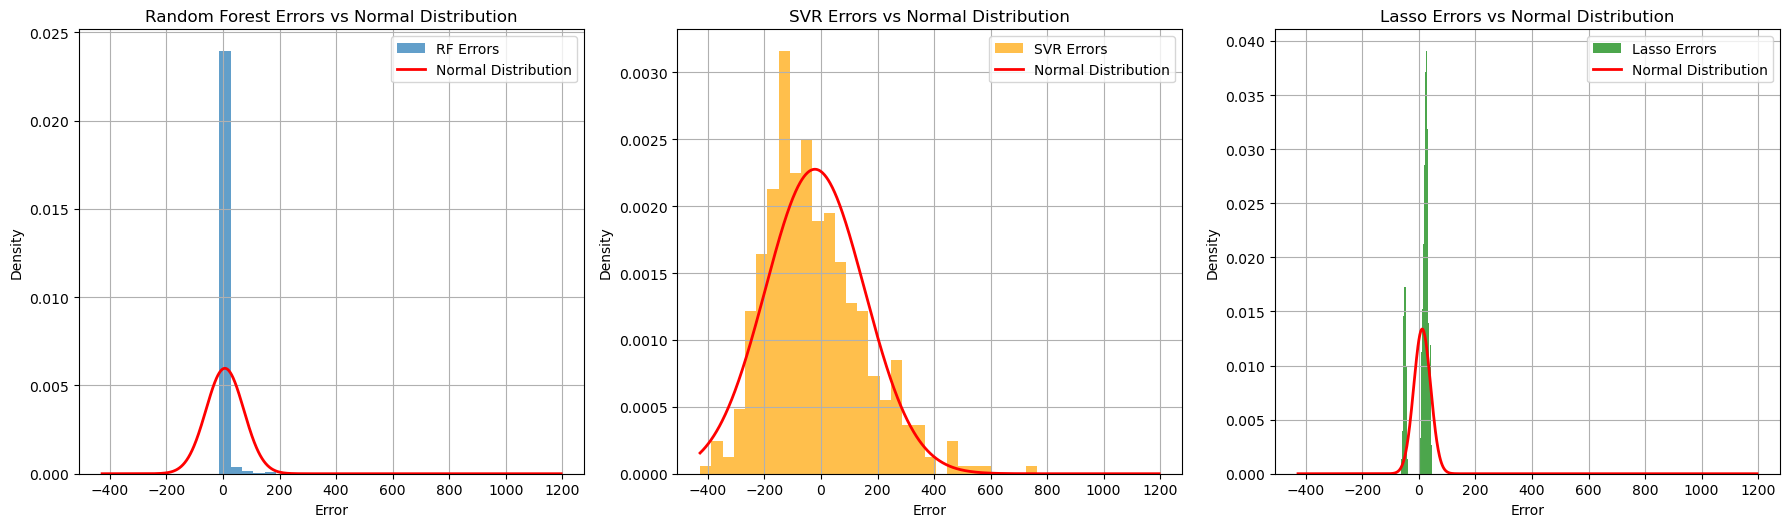

(KstestResult(statistic=0.463768115942029, pvalue=1.4490437721955926e-40, statistic_location=6.993223499999992, statistic_sign=1),
 KstestResult(statistic=0.08695652173913043, pvalue=0.08737621518799217, statistic_location=-72.16419967933243, statistic_sign=1),
 KstestResult(statistic=0.27294685990338163, pvalue=5.641580180659378e-14, statistic_location=9.001161279330173, statistic_sign=-1))

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import norm
# Get Wafer IDs from the test set for plotting
wafer_ids = test_set['WAFER_ID'].values

# Plot the errors of each model for each Wafer ID
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(errors_rf, alpha=0.5, label='RF Errors')
plt.plot(errors_svr, alpha=0.5, label='SVR Errors', color='orange')
plt.plot(errors_lasso, alpha=0.5, label='Lasso Errors', color='green')
plt.title('Errors for Each Wafer ID')
plt.xlabel('Wafer ID')
plt.ylabel('Error')
plt.legend()
plt.grid()

# Plot the relative percentage errors for each model for each Wafer ID
plt.subplot(1, 2, 2)
plt.plot(relative_errors_rf * 100, alpha=0.5, label='RF Relative Errors')
plt.plot(relative_errors_svr * 100, alpha=0.5, label='SVR Relative Errors', color='orange')
plt.plot(relative_errors_lasso * 100, alpha=0.5, label='Lasso Relative Errors', color='green')
plt.title('Relative Percentage Errors for Each Wafer ID')
plt.xlabel('Wafer ID')
plt.ylabel('Relative Percentage Error')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

from scipy.stats import norm

# Calculate the mean and std of errors for each model
mean_error_rf, std_error_rf = np.mean(errors_rf), np.std(errors_rf)
mean_error_svr, std_error_svr = np.mean(errors_svr), np.std(errors_svr)
mean_error_lasso, std_error_lasso = np.mean(errors_lasso), np.std(errors_lasso)

# Generate a range of values for the normal distribution
x_values = np.linspace(min(np.min(errors_rf), np.min(errors_svr), np.min(errors_lasso)),
                       max(np.max(errors_rf), np.max(errors_svr), np.max(errors_lasso)), 1000)
# Normal distribution for each model
normal_distribution_rf = norm.pdf(x_values, mean_error_rf, std_error_rf)
normal_distribution_svr = norm.pdf(x_values, mean_error_svr, std_error_svr)
normal_distribution_lasso = norm.pdf(x_values, mean_error_lasso, std_error_lasso)

# Plot histograms of relative errors with normal distribution curve
plt.figure(figsize=(18, 15))

# Random Forest
plt.subplot(3, 3, 1)
plt.hist(errors_rf, bins=30, alpha=0.7, density=True, label='RF Errors')
plt.plot(x_values, normal_distribution_rf, label='Normal Distribution', linewidth=2, color='red')
plt.title('Random Forest Errors vs Normal Distribution')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()
plt.grid()

# SVR
plt.subplot(3, 3, 2)
plt.hist(errors_svr, bins=30, alpha=0.7, density=True, label='SVR Errors', color='orange')
plt.plot(x_values, normal_distribution_svr, label='Normal Distribution', linewidth=2, color='red')
plt.title('SVR Errors vs Normal Distribution')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()
plt.grid()

# Lasso
plt.subplot(3, 3, 3)
plt.hist(errors_lasso, bins=30, alpha=0.7, density=True, label='Lasso Errors', color='green')
plt.plot(x_values, normal_distribution_lasso, label='Normal Distribution', linewidth=2, color='red')
plt.title('Lasso Errors vs Normal Distribution')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Perform KS-test between the error distributions and a normal distribution
ks_test_rf_vs_normal = ks_2samp(errors_rf, np.random.normal(mean_error_rf, std_error_rf, size=len(errors_rf)))
ks_test_svr_vs_normal = ks_2samp(errors_svr, np.random.normal(mean_error_svr, std_error_svr, size=len(errors_svr)))
ks_test_lasso_vs_normal = ks_2samp(errors_lasso, np.random.normal(mean_error_lasso, std_error_lasso, size=len(errors_lasso)))

ks_test_rf_vs_normal, ks_test_svr_vs_normal, ks_test_lasso_vs_normal

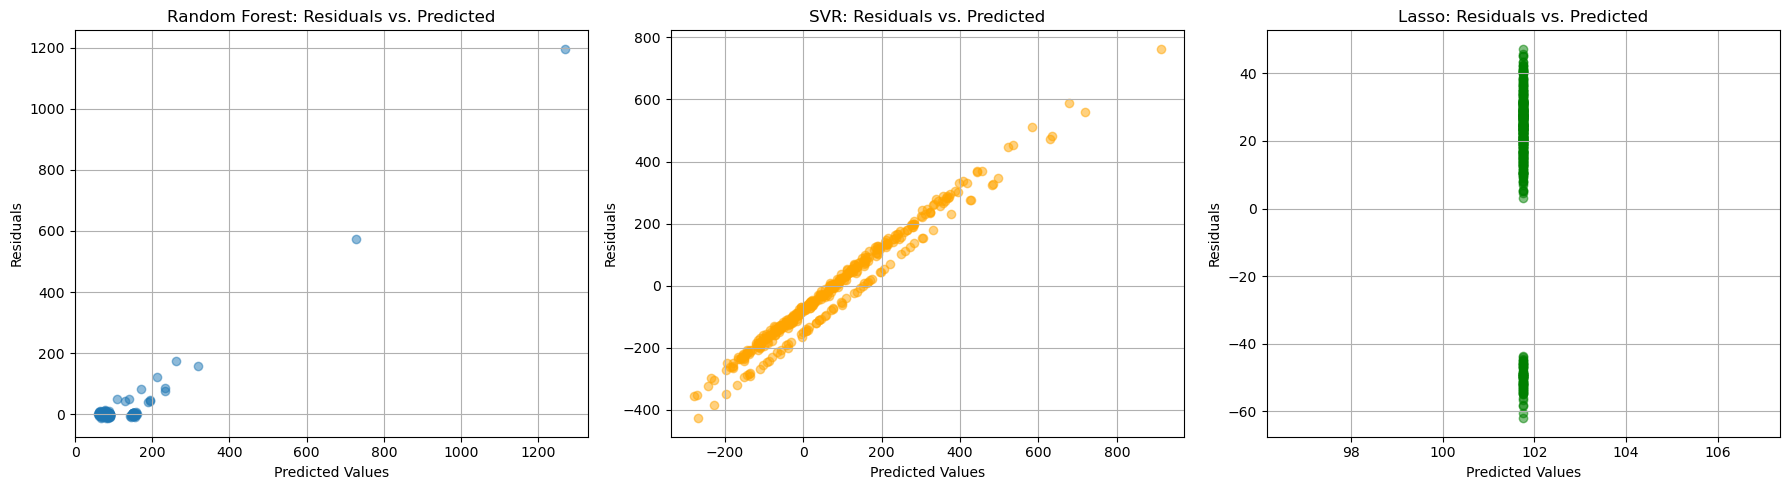

((414.0, 0.4768899541767327, nan, nan),
 (414.0, 0.4768899541767327, nan, nan),
 (414.0, 0.4768899541767327, nan, nan))

In [ ]:
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

# Visual Inspection: Plotting residuals vs. predicted values
plt.figure(figsize=(18, 5))

# Random Forest
plt.subplot(1, 3, 1)
plt.scatter(predictions_rf_inv, errors_rf, alpha=0.5)
plt.title('Random Forest: Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
# SVR
plt.subplot(1, 3, 2)
plt.scatter(predictions_svr_inv, errors_svr, alpha=0.5, color='orange')
plt.title('SVR: Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
# Lasso
plt.subplot(1, 3, 3)
plt.scatter(predictions_lasso_inv, errors_lasso, alpha=0.5, color='green')
plt.title('Lasso: Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.tight_layout()
plt.show()

# White Test for Heteroscedasticity
# For demonstration, we'll conduct the White test on Random Forest residuals
# Note: White test requires the model's predictor variables (X) and the residuals (errors)
X = sm.add_constant(scaled_test_inputs)  # adding a constant for the intercept
white_test_results_rf = het_white(errors_rf, X)
white_test_results_svr = het_white(errors_svr, X)
white_test_results_lasso = het_white(errors_lasso, X)

white_test_results_rf, white_test_results_svr, white_test_results_lasso

- Rank the features

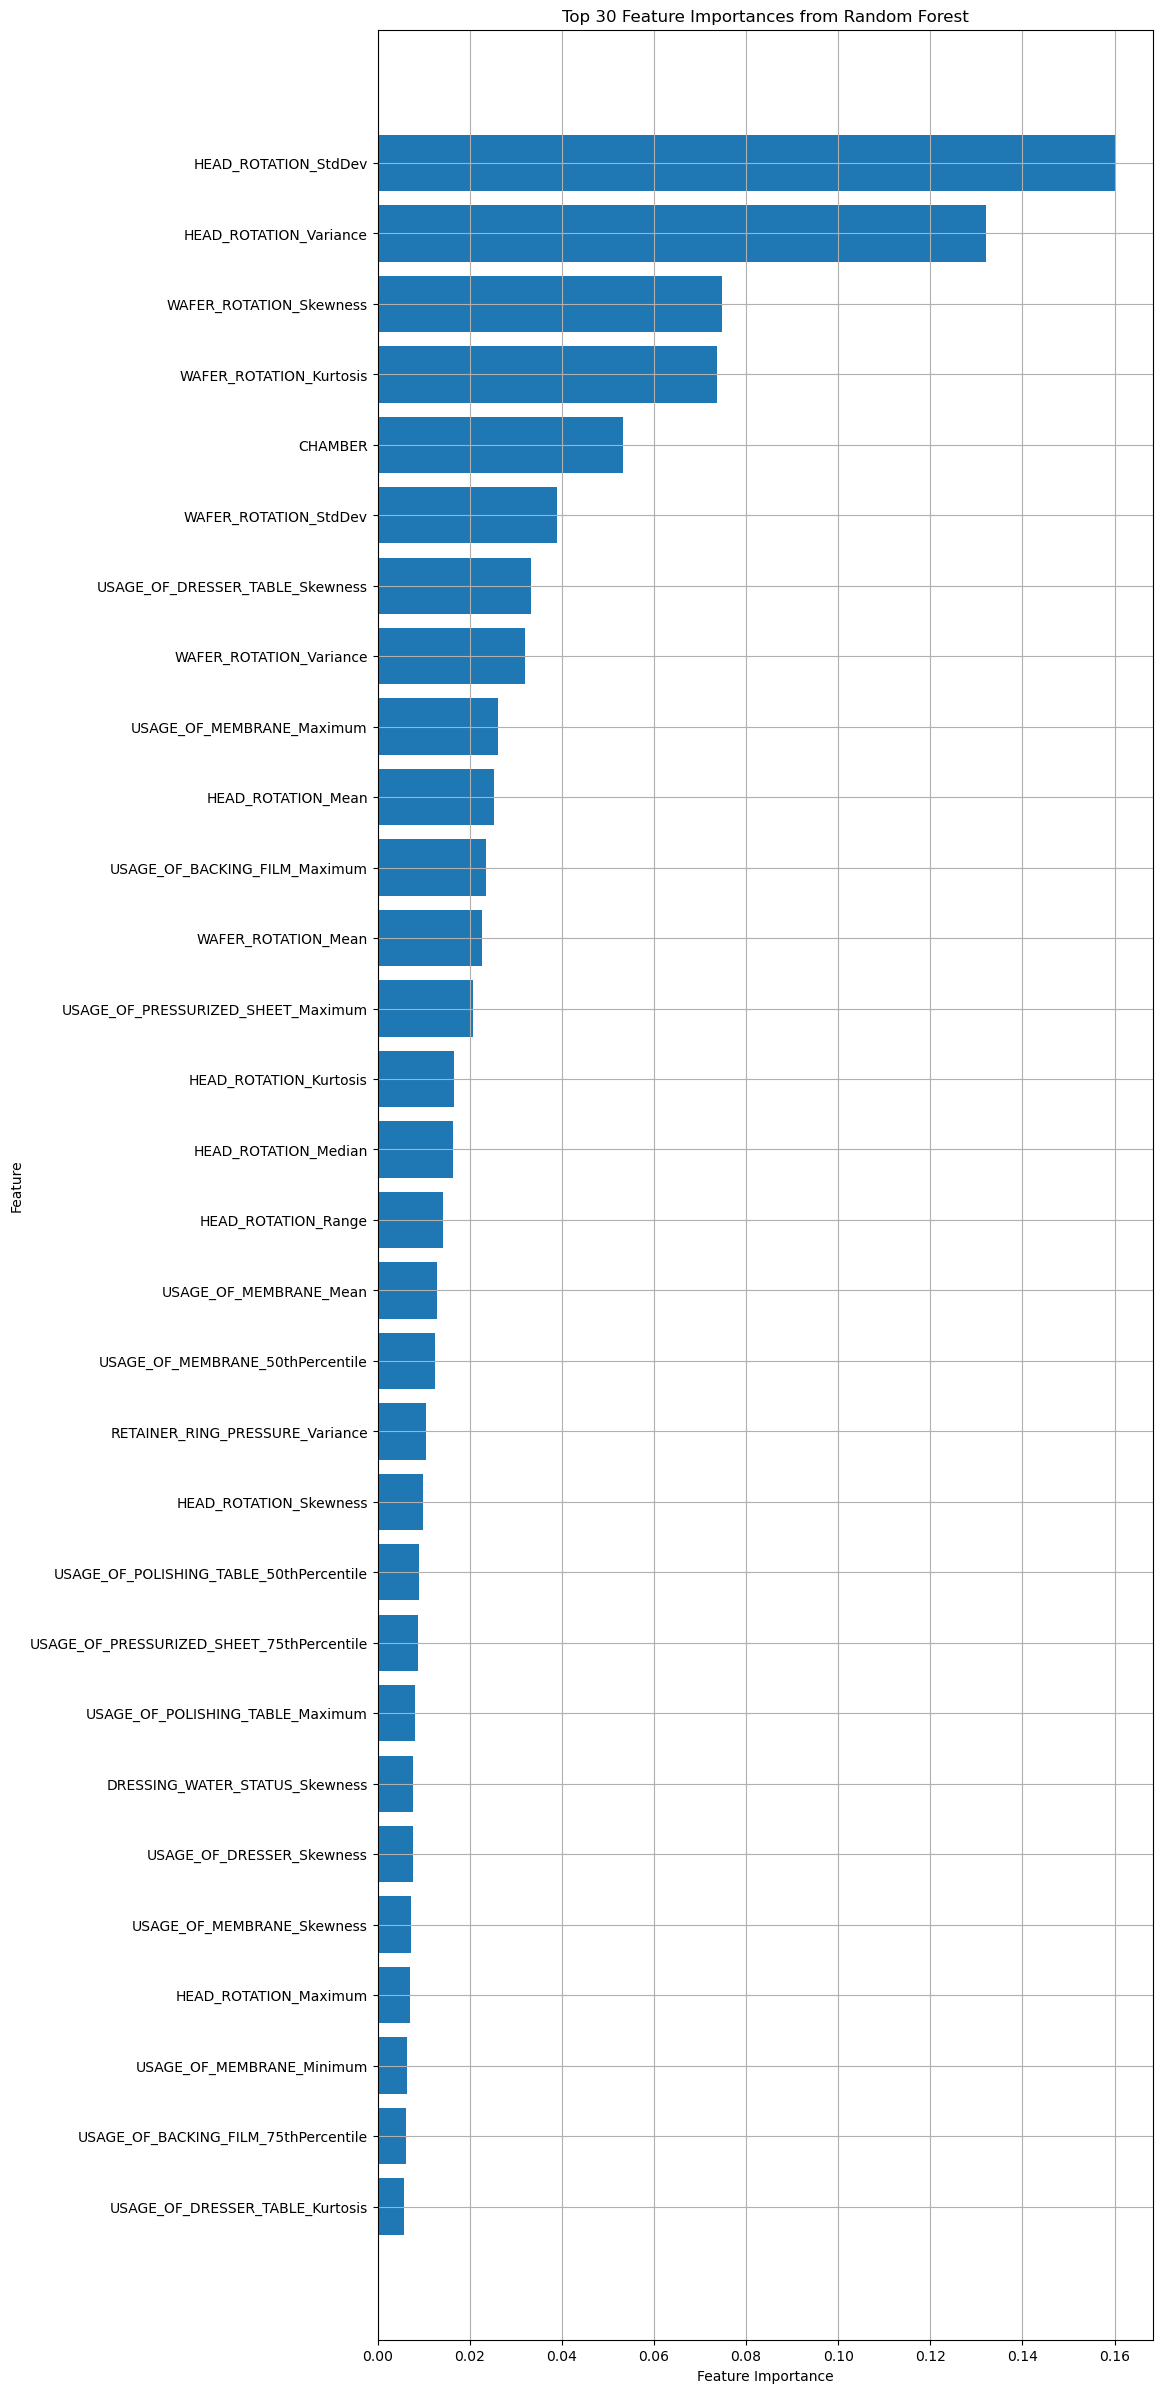

In [ ]:
# Extract feature importances from the Random Forest model and pair them with column names
feature_importances_rf = model_rf.feature_importances_
feature_names = training_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE']).columns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})

# Sort the DataFrame based on feature importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
# plt.figure(figsize=(10, 8))
# plt.barh(feature_importances_df['Feature'][:30], feature_importances_df['Importance'][:30])
plt.figure(figsize=(10, 30))
plt.barh(feature_importances_df['Feature'][:30], feature_importances_df['Importance'][:30])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 30 Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.grid()
plt.show()

- The new models

In [ ]:
# Select the top 20 features
top_20_features = feature_importances_df['Feature'][:20].values

# Initialize two MinMaxScaler: one for inputs and one for outputs
inputs_scaler = MinMaxScaler()

# Create new training and test sets with only the top 20 features
scaled_training_inputs_top20 = inputs_scaler.fit_transform(training_set[top_20_features])
scaled_test_inputs_top20 = inputs_scaler.transform(test_set[top_20_features])

# Initialize models with the same configurations
model_rf_top20 = RandomForestRegressor()
model_svr_top20 = SVR()
model_lasso_top20 = Lasso()

# Fit the models on the training data with only top 20 features
model_rf_top20.fit(scaled_training_inputs_top20, scaled_training_outputs)
model_svr_top20.fit(scaled_training_inputs_top20, scaled_training_outputs)
model_lasso_top20.fit(scaled_training_inputs_top20, scaled_training_outputs)

# Predict on the test data with only top 20 features
predictions_rf_top20 = model_rf_top20.predict(scaled_test_inputs_top20)
predictions_svr_top20 = model_svr_top20.predict(scaled_test_inputs_top20)
predictions_lasso_top20 = model_lasso_top20.predict(scaled_test_inputs_top20)

# Inverse transform the predictions and the actual values to get back to the original scale
predictions_rf_top20_inv = outputs_scaler.inverse_transform(predictions_rf_top20.reshape(-1, 1)).flatten()
predictions_svr_top20_inv = outputs_scaler.inverse_transform(predictions_svr_top20.reshape(-1, 1)).flatten()
predictions_lasso_top20_inv = outputs_scaler.inverse_transform(predictions_lasso_top20.reshape(-1, 1)).flatten()

# Calculate errors for each model (top 20 features)
errors_rf_top20 = predictions_rf_top20_inv - test_outputs_inv
errors_svr_top20 = predictions_svr_top20_inv - test_outputs_inv
errors_lasso_top20 = predictions_lasso_top20_inv - test_outputs_inv

# Calculate additional metrics for each model (top 20 features)
metrics_rf_top20_updated = {
    'Mean of Error': np.mean(errors_rf_top20),
    'Std of Error': np.std(errors_rf_top20),
    'Max of Error': np.max(errors_rf_top20),
    'MAE': mean_absolute_error(test_outputs_inv, predictions_rf_top20_inv),
    'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_rf_top20_inv),
    'Max Absolute Percentage Error': np.max(np.abs(errors_rf_top20 / test_outputs_inv)),
    'MSE': mean_squared_error(test_outputs_inv, predictions_rf_top20_inv),
    'SSE': np.sum(np.square(errors_rf_top20)),
    'R': np.corrcoef(test_outputs_inv, predictions_rf_top20_inv)[0, 1],
    'R2 Score': r2_score(test_outputs_inv, predictions_rf_top20_inv)
}

metrics_svr_top20_updated = {
    'Mean of Error': np.mean(errors_svr_top20),
    'Std of Error': np.std(errors_svr_top20),
    'Max of Error': np.max(errors_svr_top20),
    'MAE': mean_absolute_error(test_outputs_inv, predictions_svr_top20_inv),
    'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_svr_top20_inv),
    'Max Absolute Percentage Error': np.max(np.abs(errors_svr_top20 / test_outputs_inv)),
    'MSE': mean_squared_error(test_outputs_inv, predictions_svr_top20_inv),
    'SSE': np.sum(np.square(errors_svr_top20)),
    'R': np.corrcoef(test_outputs_inv, predictions_svr_top20_inv)[0, 1],
    'R2 Score': r2_score(test_outputs_inv, predictions_svr_top20_inv)
}

metrics_lasso_top20_updated = {
    'Mean of Error': np.mean(errors_lasso_top20),
    'Std of Error': np.std(errors_lasso_top20),
    'Max of Error': np.max(errors_lasso_top20),
    'MAE': mean_absolute_error(test_outputs_inv, predictions_lasso_top20_inv),
    'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_lasso_top20_inv),
    'Max Absolute Percentage Error': np.max(np.abs(errors_lasso_top20 / test_outputs_inv)),
    'MSE': mean_squared_error(test_outputs_inv, predictions_lasso_top20_inv),
    'SSE': np.sum(np.square(errors_lasso_top20)),
    'R': np.corrcoef(test_outputs_inv, predictions_lasso_top20_inv)[0, 1],
    'R2 Score': r2_score(test_outputs_inv, predictions_lasso_top20_inv)
}

# Create a pandas DataFrame to display the results
results_top20_df = pd.DataFrame({'Random Forest (Top 20)': metrics_rf_top20_updated,
                                 'SVR (Top 20)': metrics_svr_top20_updated,
                                 'Lasso (Top 20)': metrics_lasso_top20_updated})

results_top20_df.T

,Mean of Error,Std of Error,Max of Error,MAE,Mean Absolute Percentage Error,Max Absolute Percentage Error,MSE,SSE,R,R2 Score
Random Forest (Top 20),4.970096,58.991659,1069.550151,10.607756,0.123894,14.719961,3504.717654,1.450953e+06,4.650669e-01,-2.939612
SVR (Top 20),359.167891,29.628853,479.493689,359.167891,4.357955,7.749124,129879.443201,5.377009e+07,5.209389e-01,-144.995971
Lasso (Top 20),11.579264,29.826327,47.257613,29.373924,0.339342,0.867072,1023.689138,4.238073e+05,2.508861e-16,-0.150717


- Error Analysis

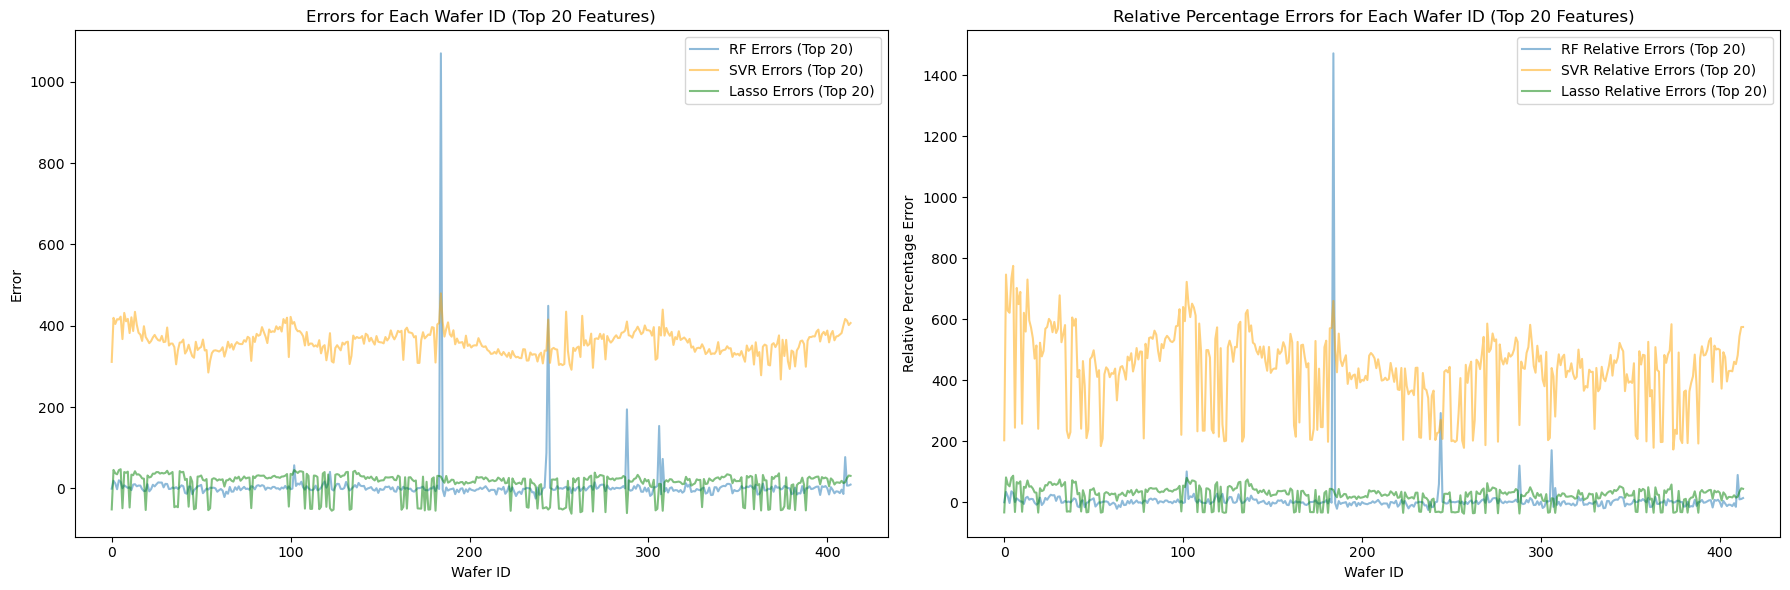

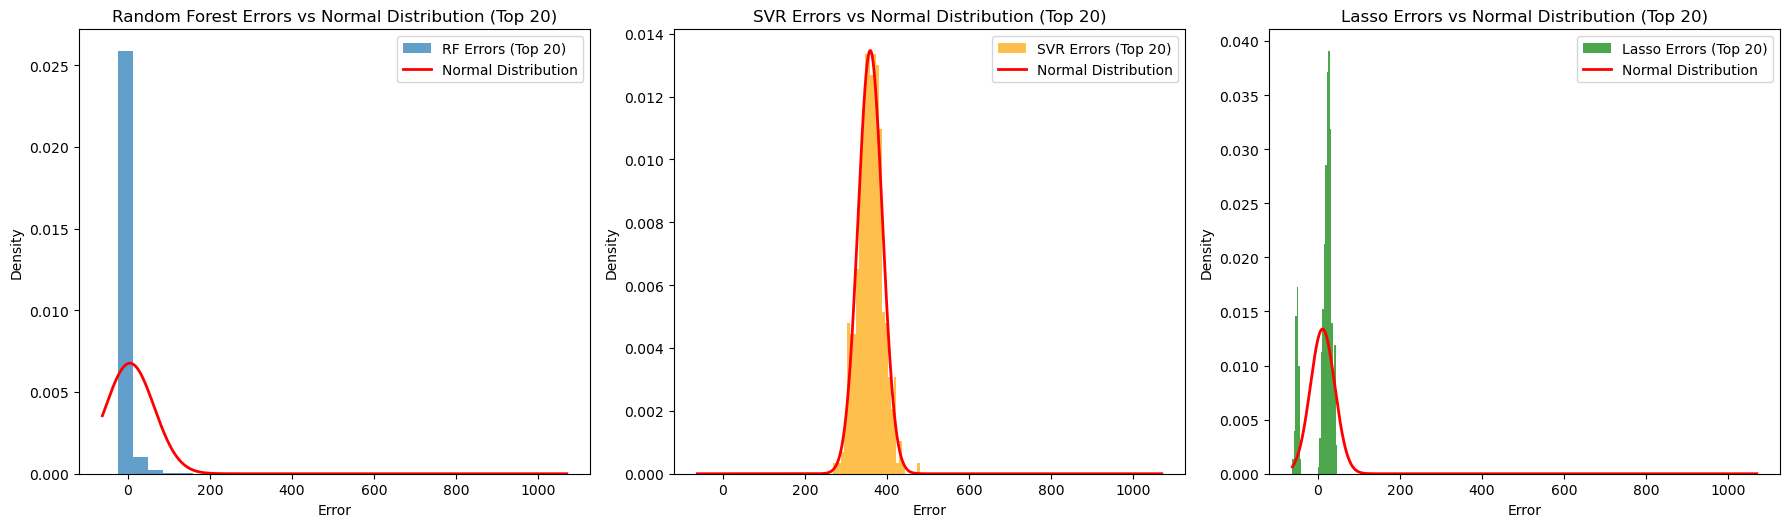

(KstestResult(statistic=0.4057971014492754, pvalue=7.2633313881072855e-31, statistic_location=12.687185999999997, statistic_sign=1),
 KstestResult(statistic=0.06280193236714976, pvalue=0.3882093304398583, statistic_location=337.7187962270129, statistic_sign=-1),
 KstestResult(statistic=0.23671497584541062, pvalue=1.3883077809506164e-10, statistic_location=10.032711843662074, statistic_sign=-1))

In [ ]:
# Calculate relative errors for each model (top 20 features)
relative_errors_rf_top20 = errors_rf_top20 / np.maximum(np.abs(test_outputs_inv), 1e-8)
relative_errors_svr_top20 = errors_svr_top20 / np.maximum(np.abs(test_outputs_inv), 1e-8)
relative_errors_lasso_top20 = errors_lasso_top20 / np.maximum(np.abs(test_outputs_inv), 1e-8)

# Plot the errors of each model for each Wafer ID
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(errors_rf_top20, alpha=0.5, label='RF Errors (Top 20)')
plt.plot(errors_svr_top20, alpha=0.5, label='SVR Errors (Top 20)', color='orange')
plt.plot(errors_lasso_top20, alpha=0.5, label='Lasso Errors (Top 20)', color='green')
plt.title('Errors for Each Wafer ID (Top 20 Features)')
plt.xlabel('Wafer ID')
plt.ylabel('Error')
plt.legend()

# Plot the relative percentage errors for each model for each Wafer ID
plt.subplot(1, 2, 2)
plt.plot(relative_errors_rf_top20 * 100, alpha=0.5, label='RF Relative Errors (Top 20)')
plt.plot(relative_errors_svr_top20 * 100, alpha=0.5, label='SVR Relative Errors (Top 20)', color='orange')
plt.plot(relative_errors_lasso_top20 * 100, alpha=0.5, label='Lasso Relative Errors (Top 20)', color='green')
plt.title('Relative Percentage Errors for Each Wafer ID (Top 20 Features)')
plt.xlabel('Wafer ID')
plt.ylabel('Relative Percentage Error')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the mean and std of errors for each model (top 20 features)
mean_error_rf_top20, std_error_rf_top20 = np.mean(errors_rf_top20), np.std(errors_rf_top20)
mean_error_svr_top20, std_error_svr_top20 = np.mean(errors_svr_top20), np.std(errors_svr_top20)
mean_error_lasso_top20, std_error_lasso_top20 = np.mean(errors_lasso_top20), np.std(errors_lasso_top20)

# Generate a range of values for the normal distribution
x_values = np.linspace(min(np.min(errors_rf_top20), np.min(errors_svr_top20), np.min(errors_lasso_top20)),
                       max(np.max(errors_rf_top20), np.max(errors_svr_top20), np.max(errors_lasso_top20)), 1000)
# Normal distribution for each model
normal_distribution_rf_top20 = norm.pdf(x_values, mean_error_rf_top20, std_error_rf_top20)
normal_distribution_svr_top20 = norm.pdf(x_values, mean_error_svr_top20, std_error_svr_top20)
normal_distribution_lasso_top20 = norm.pdf(x_values, mean_error_lasso_top20, std_error_lasso_top20)

# Plot histograms of relative errors with normal distribution curve
plt.figure(figsize=(18, 15))

# Random Forest (Top 20)
plt.subplot(3, 3, 1)
plt.hist(errors_rf_top20, bins=30, alpha=0.7, density=True, label='RF Errors (Top 20)')
plt.plot(x_values, normal_distribution_rf_top20, label='Normal Distribution', linewidth=2, color='red')
plt.title('Random Forest Errors vs Normal Distribution (Top 20)')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()

# SVR (Top 20)
plt.subplot(3, 3, 2)
plt.hist(errors_svr_top20, bins=30, alpha=0.7, density=True, label='SVR Errors (Top 20)', color='orange')
plt.plot(x_values, normal_distribution_svr_top20, label='Normal Distribution', linewidth=2, color='red')
plt.title('SVR Errors vs Normal Distribution (Top 20)')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()

# Lasso (Top 20)
plt.subplot(3, 3, 3)
plt.hist(errors_lasso_top20, bins=30, alpha=0.7, density=True, label='Lasso Errors (Top 20)', color='green')
plt.plot(x_values, normal_distribution_lasso_top20, label='Normal Distribution', linewidth=2, color='red')
plt.title('Lasso Errors vs Normal Distribution (Top 20)')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Generate normal distributions based on the mean and std of errors for each model (top 20 features)
normal_errors_rf_top20 = np.random.normal(mean_error_rf_top20, std_error_rf_top20, size=len(errors_rf_top20))
normal_errors_svr_top20 = np.random.normal(mean_error_svr_top20, std_error_svr_top20, size=len(errors_svr_top20))
normal_errors_lasso_top20 = np.random.normal(mean_error_lasso_top20, std_error_lasso_top20, size=len(errors_lasso_top20))

# Perform KS-test between the error distributions and a normal distribution
ks_test_rf_top20_vs_normal = ks_2samp(errors_rf_top20, normal_errors_rf_top20)
ks_test_svr_top20_vs_normal = ks_2samp(errors_svr_top20, normal_errors_svr_top20)
ks_test_lasso_top20_vs_normal = ks_2samp(errors_lasso_top20, normal_errors_lasso_top20)

ks_test_rf_top20_vs_normal, ks_test_svr_top20_vs_normal, ks_test_lasso_top20_vs_normal


ReliefF

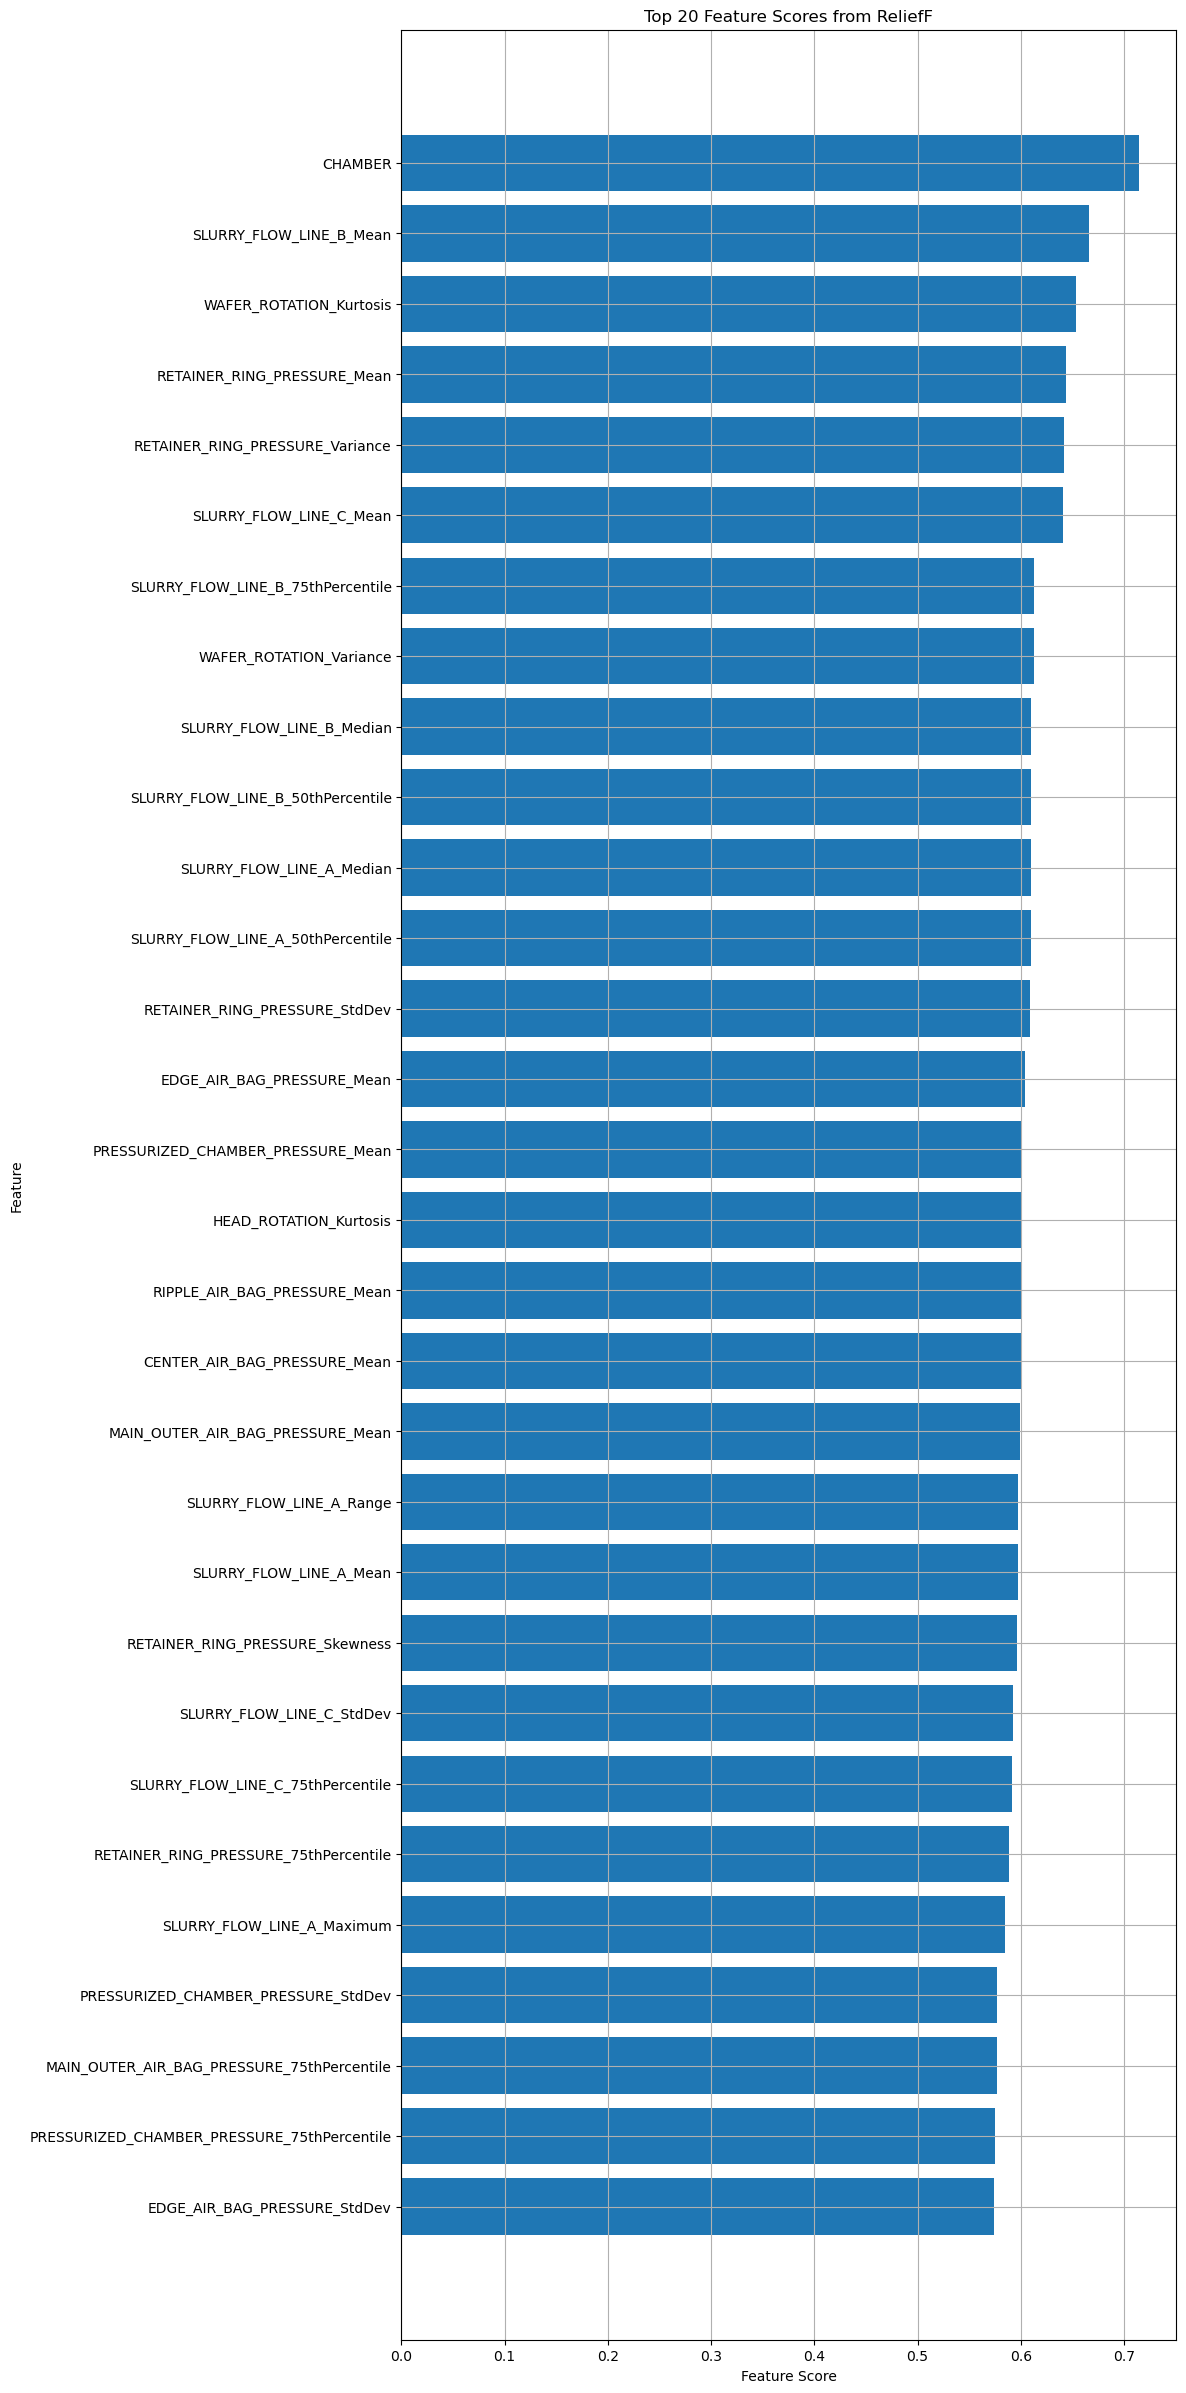

In [ ]:
from skrebate import ReliefF
from sklearn.model_selection import train_test_split

X = training_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE']).values
y = training_set['AVG_REMOVAL_RATE'].values

# It's a good practice to use a train/test split to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y)

fs = ReliefF(n_neighbors=30)
fs.fit(X_train, y_train)

feature_scores_dict = {feature_name: feature_score for feature_name, feature_score in zip(training_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE']).columns, fs.feature_importances_)}

# Sort the dictionary by values (feature scores) in descending order
sorted_features = sorted(feature_scores_dict.items(), key=lambda item: item[1], reverse=True)

# Extract the sorted feature names and scores
sorted_feature_names = [feature[0] for feature in sorted_features]
sorted_feature_scores = [feature[1] for feature in sorted_features]

# Plot
plt.figure(figsize=(10, 30))
plt.barh(sorted_feature_names[:30], sorted_feature_scores[:30])
plt.xlabel('Feature Score')
plt.ylabel('Feature')|
plt.title('Top 20 Feature Scores from ReliefF')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.grid()
plt.show()

In [ ]:
from itertools import zip_longest
print("Features from RF\t\t\t\tFeature from ReliefF")
print("--------------------------------------------------------------")
for item1, item2 in zip_longest(feature_importances_df['Feature'].values[:30], sorted_feature_names[:30]):
    print(f"{item1}\t\t\t\t {item2}")

Features from RF				Feature from ReliefF
--------------------------------------------------------------
HEAD_ROTATION_StdDev				 SLURRY_FLOW_LINE_B_Mean
HEAD_ROTATION_Variance				 CHAMBER
WAFER_ROTATION_Skewness				 RETAINER_RING_PRESSURE_Mean
WAFER_ROTATION_Kurtosis				 SLURRY_FLOW_LINE_B_75thPercentile
CHAMBER				 SLURRY_FLOW_LINE_C_Mean
WAFER_ROTATION_StdDev				 SLURRY_FLOW_LINE_A_Median
USAGE_OF_DRESSER_TABLE_Skewness				 SLURRY_FLOW_LINE_A_50thPercentile
WAFER_ROTATION_Variance				 SLURRY_FLOW_LINE_B_Median
USAGE_OF_MEMBRANE_Maximum				 SLURRY_FLOW_LINE_B_50thPercentile
HEAD_ROTATION_Mean				 WAFER_ROTATION_Variance
USAGE_OF_BACKING_FILM_Maximum				 HEAD_ROTATION_Kurtosis
WAFER_ROTATION_Mean				 SLURRY_FLOW_LINE_A_Range
USAGE_OF_PRESSURIZED_SHEET_Maximum				 RETAINER_RING_PRESSURE_Variance
HEAD_ROTATION_Kurtosis				 RETAINER_RING_PRESSURE_StdDev
HEAD_ROTATION_Median				 SLURRY_FLOW_LINE_A_Maximum
HEAD_ROTATION_Range				 SLURRY_FLOW_LINE_C_StdDev
USAGE_OF_MEMBRANE_Mean				 EDGE_AIR

In [ ]:
set1 = set(feature_importances_df['Feature'].values[:40])
set2 = set(sorted_feature_names[:20])

commmon = set1.intersection(set2)
print(commmon)

{'RETAINER_RING_PRESSURE_Variance', 'CHAMBER', 'HEAD_ROTATION_Kurtosis', 'WAFER_ROTATION_Kurtosis', 'WAFER_ROTATION_Variance'}
